In [6]:
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize

# Training the required Models and Feature Sets

In [ ]:
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

In [ ]:
def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

In [20]:
short_pos = open("positive.txt","r",encoding='latin-1').read()
short_neg = open("negative.txt","r",encoding='latin-1').read()

# move this up here
all_words = []
documents = []

#  j is adject, r is adverb, and v is verb
#allowed_word_types = ["J","R","V"]
allowed_word_types = ["J"]

for p in short_pos.split('\n'):
    documents.append( (p, "pos") )
    words = word_tokenize(p)
    pos = nltk.pos_tag(words)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())
  
for p in short_neg.split('\n'):
    documents.append( (p, "neg") )
    words = word_tokenize(p)
    pos = nltk.pos_tag(words)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

save_documents = open("documents.pickle","wb")
pickle.dump(documents, save_documents)
save_documents.close()


all_words = nltk.FreqDist(all_words)


word_features = list(all_words.keys())[:5000]

save_word_features = open("word_features5k.pickle","wb")
pickle.dump(word_features, save_word_features)
save_word_features.close()


featuresets = [(find_features(rev), category) for (rev, category) in documents]

save_featuresets = open("featuresets.pickle","wb")
pickle.dump(featuresets, save_featuresets)
save_featuresets.close()

random.shuffle(featuresets)
print(len(featuresets))

testing_set = featuresets[10000:]
training_set = featuresets[:10000]

##### Training Models #######

# NLTK Naive Bayes
classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

save_classifier = open("originalnaivebayes5k.pickle","wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

# SKLearn Multinormial Naive Bayes
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set))*100)

save_classifier = open("MNB_classifier5k.pickle","wb")
pickle.dump(MNB_classifier, save_classifier)
save_classifier.close()

# SKLearn Bernoulli Naive Bayes
BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

save_classifier = open("BernoulliNB_classifier5k.pickle","wb")
pickle.dump(BernoulliNB_classifier, save_classifier)
save_classifier.close()

# SKLearn Logistic Regression
LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

save_classifier = open("LogisticRegression_classifier5k.pickle","wb")
pickle.dump(LogisticRegression_classifier, save_classifier)
save_classifier.close()

# SKLearn Linear SVM
LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

save_classifier = open("LinearSVC_classifier5k.pickle","wb")
pickle.dump(LinearSVC_classifier, save_classifier)
save_classifier.close()

# SKLearn SGDC Classifier
SGDC_classifier = SklearnClassifier(SGDClassifier())
SGDC_classifier.train(training_set)
print("SGDClassifier accuracy percent:",nltk.classify.accuracy(SGDC_classifier, testing_set)*100)

save_classifier = open("SGDC_classifier5k.pickle","wb")
pickle.dump(SGDC_classifier, save_classifier)
save_classifier.close()

10664
Original Naive Bayes Algo accuracy percent: 71.3855421686747
Most Informative Features
              engrossing = True              pos : neg    =     20.4 : 1.0
                    warm = True              pos : neg    =     19.7 : 1.0
                mediocre = True              neg : pos    =     16.3 : 1.0
                 routine = True              neg : pos    =     15.6 : 1.0
                 generic = True              neg : pos    =     15.6 : 1.0
               inventive = True              pos : neg    =     15.1 : 1.0
                    flat = True              neg : pos    =     14.5 : 1.0
                  unique = True              pos : neg    =     14.4 : 1.0
              refreshing = True              pos : neg    =     13.7 : 1.0
                  boring = True              neg : pos    =     13.5 : 1.0
               wonderful = True              pos : neg    =     12.6 : 1.0
               affecting = True              pos : neg    =     11.7 : 1.0
       

# 

## Reloading Saved Models

In [6]:
documents_f = open("documents.pickle", "rb")
documents = pickle.load(documents_f)
documents_f.close()


word_features5k_f = open("word_features5k.pickle", "rb")
word_features = pickle.load(word_features5k_f)
word_features5k_f.close()

featuresets_f = open("featuresets.pickle", "rb")
featuresets = pickle.load(featuresets_f)
featuresets_f.close()

random.shuffle(featuresets)
print(len(featuresets))

testing_set = featuresets[10000:]
training_set = featuresets[:10000]


open_file = open("originalnaivebayes5k.pickle", "rb")
classifier = pickle.load(open_file)
open_file.close()

open_file = open("MNB_classifier5k.pickle", "rb")
MNB_classifier = pickle.load(open_file)
open_file.close()

open_file = open("BernoulliNB_classifier5k.pickle", "rb")
BernoulliNB_classifier = pickle.load(open_file)
open_file.close()

open_file = open("LogisticRegression_classifier5k.pickle", "rb")
LogisticRegression_classifier = pickle.load(open_file)
open_file.close()

open_file = open("LinearSVC_classifier5k.pickle", "rb")
LinearSVC_classifier = pickle.load(open_file)
open_file.close()

open_file = open("SGDC_classifier5k.pickle", "rb")
SGDC_classifier = pickle.load(open_file)
open_file.close()


voted_classifier = VoteClassifier(
                                  classifier,
                                  LinearSVC_classifier,
                                  MNB_classifier,
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier)

10664


In [27]:
def sentiment(text):
    feats = find_features(text)
    return voted_classifier.classify(feats),voted_classifier.confidence(feats)

In [26]:
#Checking Sentiment Outputs.

print(sentiment("This movie was awesome! The acting was great, plot was wonderful, and there were pythons...so yea!"))
print(sentiment("This movie was utter junk. There were absolutely 0 pythons. I don't see what the point was at all. Horrible movie, 0/10"))

('pos', 1.0)
('neg', 1.0)


# Loading in Tweets to Create Sentiment Results

In [4]:
import pandas
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
%matplotlib inline
import time
from timeit import default_timer as timer

style.use("ggplot")

/Users/andy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 'U' mode is deprecated
  after removing the cwd from sys.path.


In [ ]:
start = timer()

for each_tweet in april_tweet['full_text']:
    sentiment_value, confidence = sentiment(each_tweet)
    #print(each_tweet, sentiment_value, confidence)

    output = open("twitter-out-april.txt","a")

    output.write(sentiment_value)
    output.write('\n')
    output.close()

end = timer()
print(end - start)

## Sentiment Results Plotted

In [ ]:
jan_feb_tweet = pandas.read_csv(open('output jan feb.csv','rU'), encoding='utf-8', engine='c')
march_tweet = pandas.read_csv(open('output march.csv','rU'), encoding='utf-8', engine='c')
april_tweet = pandas.read_csv(open('output april 2.csv','rU'), encoding='utf-8', engine='c')
jan_april_tweet = pandas.read_csv(open('output jan april.csv','rU'), encoding='utf-8', engine='c')

In [ ]:
style.use("ggplot")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("twitter-out-jan_feb.txt","r").read()
    lines = pullData.split('\n')

    xar = []
    yar = []

    x = 0
    y = 0

    for l in lines[-200:]:
        x += 1
        if "pos" in l:
            y += 1
        elif "neg" in l:
            y -= 1

        xar.append(x)
        yar.append(y)
    
    ax1.clear()
    plt.title('Jan - February\'s Figures')
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()

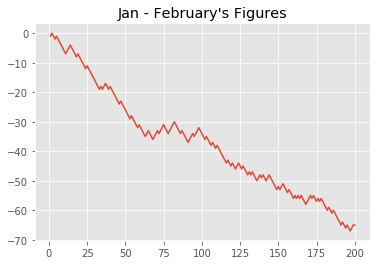

In [20]:
#Jan - Feb
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("twitter-out-jan_feb.txt","r").read()
    lines = pullData.split('\n')

    xar = []
    yar = []

    x = 0
    y = 0

    for l in lines[-200:]:
        x += 1
        if "pos" in l:
            y += 1
        elif "neg" in l:
            y -= 1

        xar.append(x)
        yar.append(y)
    
    ax1.clear()
    plt.title('Jan - February\'s Figures')
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()

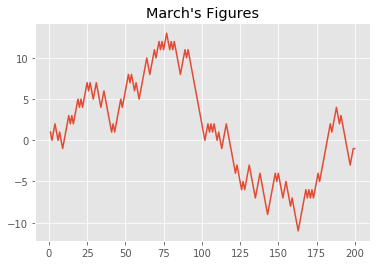

In [19]:
# March
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("twitter-out-march.txt","r").read()
    lines = pullData.split('\n')

    xar = []
    yar = []

    x = 0
    y = 0

    for l in lines[-200:]:
        x += 1
        if "pos" in l:
            y += 1
        elif "neg" in l:
            y -= 1

        xar.append(x)
        yar.append(y)
    
    
    ax1.clear()
    plt.title('March\'s Figures')
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()

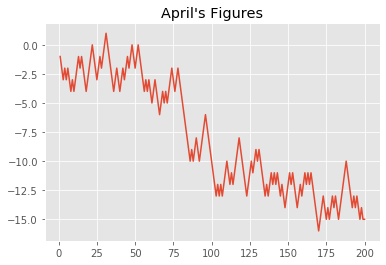

In [15]:
# April
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("twitter-out-april.txt","r").read()
    lines = pullData.split('\n')

    xar = []
    yar = []

    x = 0
    y = 0

    for l in lines[-200:]:
        x += 1
        
        if "pos" in l:
            y += 1
        elif "neg" in l:
            y -= 1

        xar.append(x)
        yar.append(y)
        
    ax1.clear()
    plt.title('April\'s Figures')
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)

plt.show()

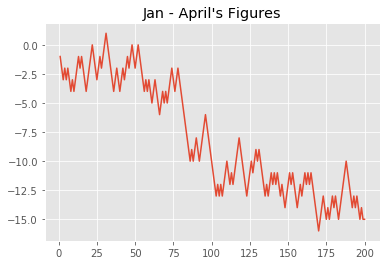

In [16]:
# Jan - April
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("twitter-out-all.txt","r").read()
    lines = pullData.split('\n')

    xar = []
    yar = []

    x = 0
    y = 0

    for l in lines[-200:]:
        x += 1 
        
        if "pos" in l:
            y += 1
        elif "neg" in l:
            y -= 1

        xar.append(x)
        yar.append(y)
        
    ax1.clear()
    plt.title('Jan - April\'s Figures')
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)

plt.show()

## End of Solution